In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Useful to separate an image into 'semantic' components: Things are different
<img src="Images/segmentation.png">

### Let's start with a simple example. How would you do this?

In [44]:
img = Image.open('Images/apple.png')

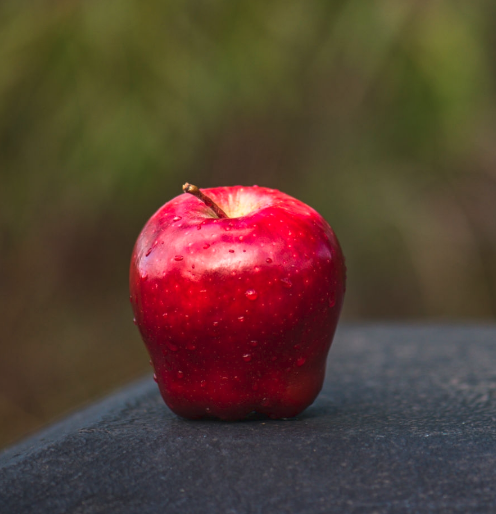

In [45]:
img

In [46]:
data = np.array(img)

In [47]:
data.shape

(514, 496, 4)

In [54]:
mask = data[:,:,0] > 120

In [55]:
mask.shape

(514, 496)

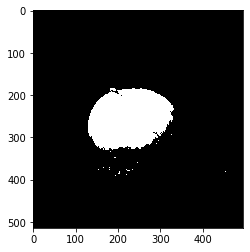

In [56]:
plt.imshow(mask, cmap='gray')

In [57]:
mask = np.tile(mask.reshape(514, 496, 1), (1,1,4))
mask.shape

(514, 496, 4)

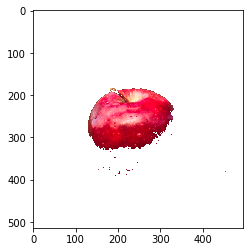

In [58]:
plt.imshow(data * mask)

### Takeaway: An object (or a portion of the object) is similarly coloured across its surface

### Something we can do now is to look at neighbouring regions of these pixels, since the pixels of an object are also *Close together*

# How do we automatically find "similar" pixels (close together in RGB and distance)? 

### Clustering - Finding groups of things (eg. people or pixels), that have similar values (eg. height, or color) 

(0, 10)

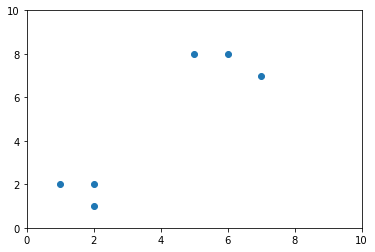

In [65]:
X = np.array([1,2,2,5,7,6])
Y = np.array([2,1,2,8,7,8])
plt.scatter(X,Y)
plt.xlim(0, 10)
plt.ylim(0, 10)

In [64]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

### This is to test the performance of k-Means on a sample

In [70]:
data.shape

(514, 496, 4)

In [83]:
from sklearn.cluster import KMeans
normalized = (data/255.0)
values = []
for x in range(normalized.shape[0]):
    for y in range(normalized.shape[1]):
        values.append([x,y,normalized[x,y,0], normalized[x,y,1], normalized[x,y,2]])
kmeans = KMeans(n_clusters=15, random_state=0).fit(values)
pic2show = kmeans.cluster_centers_[kmeans.labels_].reshape(514, 496)
plt.imshow(pic2show)

ValueError: cannot reshape array of size 1274720 into shape (514,496)